CIFAR 10 classification model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
labels = {  
    0:"airplane",
    1:"automobile",
    2:"bird",
    3:"cat",
    4:"deer",
    5:"dog",
    6:"frog",
    7:"horse",
    8:"ship",
    9:"truck"
}

print(x_train.shape)

(50000, 32, 32, 3)


### Quantities of test and train samples for each class

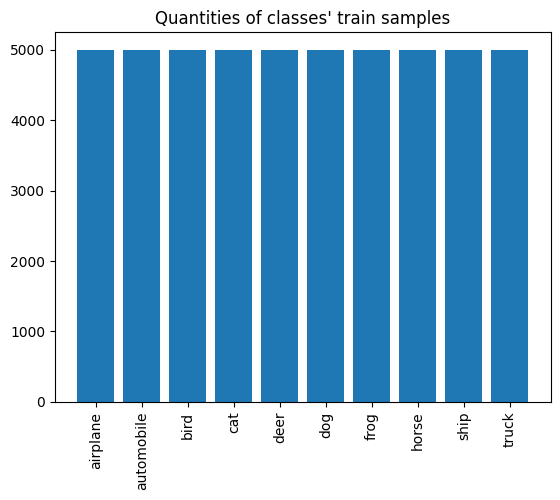

In [2]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique,counts)
plt.title("Quantities of classes' train samples")
plt.xticks(unique, [labels[i] for i in unique],rotation='vertical')
plt.show()

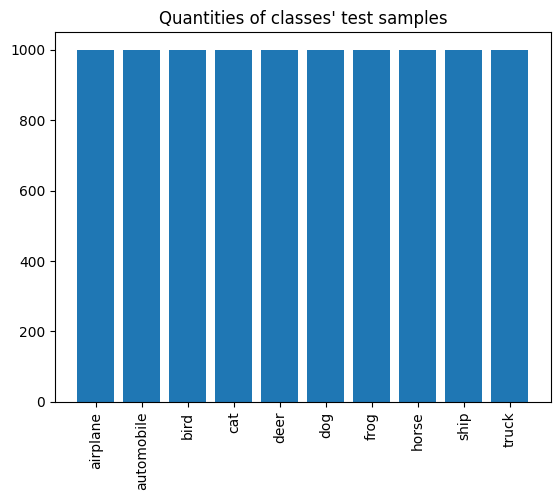

In [3]:
unique, counts = np.unique(y_test, return_counts=True)
plt.bar(unique,counts)
plt.title("Quantities of classes' test samples")
plt.xticks(unique, [labels[i] for i in unique],rotation='vertical')
plt.show()

every class is equal size so dummy classifier with prediction based on highest probability of chosing sample at random would have average score of 10 %

### random forest as a simple benchmark for CNN:

In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=123)
x_train_flatened = x_train.reshape(len(x_train), 32*32*3)
x_test_flatened = x_test.reshape(len(x_test), 32*32*3)
clf.fit(x_train_flatened, y_train)


C:\Users\nikos\AppData\Local\Temp\ipykernel_4976\3917763080.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train_flatened, y_train)


RandomForestClassifier(max_depth=2, random_state=123)

In [5]:
from sklearn.metrics import f1_score, recall_score, precision_score
y_pred = clf.predict(x_test_flatened)
print("accuracy: ",clf.score(x_test_flatened, y_test))
print("recall: ",recall_score(y_test, y_pred, average = 'macro'))
print("precision: ",precision_score(y_test, y_pred, average = 'macro'))
print("f1: ",f1_score(y_test, y_pred, average = 'macro'))

accuracy:  0.2631
recall:  0.2631
precision:  0.29724307558756846
f1:  0.22214264616571316


c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## CNN


Dataloader:

In [6]:

from torch.utils.data import Dataset,DataLoader
from sklearn.preprocessing import OneHotEncoder
import torch
class Cifar10(Dataset):
    def __init__(self):
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
        self.X = torch.from_numpy(np.array(x_train)).type(torch.float)
        enc = OneHotEncoder(handle_unknown='ignore')
        enc = enc.fit(y_train)
        self.y = torch.from_numpy(np.array(enc.transform(y_train).toarray())).type(torch.float)
        self.n_samples = x_train.__len__()

    
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
    def __len__(self):
        return self.n_samples

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_test = torch.from_numpy(np.array(x_test)).type(torch.float)
enc = OneHotEncoder(handle_unknown='ignore')
enc = enc.fit(y_test)
y_test = torch.from_numpy(np.array(enc.transform(y_test).toarray())).type(torch.float)

dataset_cifar10 = Cifar10()
dataloader_cifar10 = DataLoader(dataset=dataset_cifar10,batch_size=10,shuffle=True)

### LeNet like architecture (changed):

In [8]:
from CNN_cifar10 import CNN_cifar10

CNN model trian

In [9]:
cnn_model = CNN_cifar10()
train_loss,test_loss,train_accuracy,test_accuracy = cnn_model.train(60,dataloader_cifar10,x_test, y_test)

100%|█████████▉| 4999/5000 [01:04<00:00, 77.02it/s]


EPOCH: 1, TEST_LOSS 2.2288044921875, TEST_ACCURACY 0.2197


100%|█████████▉| 4999/5000 [01:07<00:00, 74.24it/s]


EPOCH: 2, TEST_LOSS 2.2034173828125, TEST_ACCURACY 0.2412


100%|█████████▉| 4999/5000 [01:06<00:00, 75.43it/s]


EPOCH: 3, TEST_LOSS 2.1861859375, TEST_ACCURACY 0.2633


100%|█████████▉| 4999/5000 [01:04<00:00, 77.28it/s]


EPOCH: 4, TEST_LOSS 2.1708568359375, TEST_ACCURACY 0.2828


100%|█████████▉| 4999/5000 [01:06<00:00, 75.06it/s]


EPOCH: 5, TEST_LOSS 2.1601619140625, TEST_ACCURACY 0.2912


100%|█████████▉| 4999/5000 [01:06<00:00, 75.40it/s]


EPOCH: 6, TEST_LOSS 2.15035, TEST_ACCURACY 0.2992


100%|█████████▉| 4999/5000 [01:06<00:00, 75.09it/s]


EPOCH: 7, TEST_LOSS 2.1238923828125, TEST_ACCURACY 0.3317


100%|█████████▉| 4999/5000 [01:06<00:00, 75.65it/s]


EPOCH: 8, TEST_LOSS 2.11208515625, TEST_ACCURACY 0.3431


100%|█████████▉| 4999/5000 [01:06<00:00, 74.65it/s]


EPOCH: 9, TEST_LOSS 2.0884345703125, TEST_ACCURACY 0.3692


100%|█████████▉| 4999/5000 [01:06<00:00, 74.70it/s]


EPOCH: 10, TEST_LOSS 2.0793125, TEST_ACCURACY 0.378


100%|█████████▉| 4999/5000 [01:05<00:00, 75.95it/s]


EPOCH: 11, TEST_LOSS 2.0782015625, TEST_ACCURACY 0.3779


100%|█████████▉| 4999/5000 [01:05<00:00, 75.85it/s]


EPOCH: 12, TEST_LOSS 2.0615796875, TEST_ACCURACY 0.3974


100%|█████████▉| 4999/5000 [01:06<00:00, 74.96it/s]


EPOCH: 13, TEST_LOSS 2.0539669921875, TEST_ACCURACY 0.4051


100%|█████████▉| 4999/5000 [01:05<00:00, 76.36it/s]


EPOCH: 14, TEST_LOSS 2.053783984375, TEST_ACCURACY 0.4044


100%|█████████▉| 4999/5000 [01:04<00:00, 77.08it/s]


EPOCH: 15, TEST_LOSS 2.0367650390625, TEST_ACCURACY 0.4233


100%|█████████▉| 4999/5000 [01:04<00:00, 77.21it/s]


EPOCH: 16, TEST_LOSS 2.038868359375, TEST_ACCURACY 0.4191


100%|█████████▉| 4999/5000 [01:04<00:00, 77.43it/s]


EPOCH: 17, TEST_LOSS 2.0448998046875, TEST_ACCURACY 0.4108


100%|█████████▉| 4999/5000 [01:05<00:00, 76.84it/s]


EPOCH: 18, TEST_LOSS 2.025377734375, TEST_ACCURACY 0.4339


100%|█████████▉| 4999/5000 [01:04<00:00, 77.39it/s]


EPOCH: 19, TEST_LOSS 2.0248482421875, TEST_ACCURACY 0.4326


100%|█████████▉| 4999/5000 [01:04<00:00, 77.05it/s]


EPOCH: 20, TEST_LOSS 2.013659765625, TEST_ACCURACY 0.4434


100%|█████████▉| 4999/5000 [01:04<00:00, 77.20it/s]


EPOCH: 21, TEST_LOSS 2.0118861328125, TEST_ACCURACY 0.4473


100%|█████████▉| 4999/5000 [01:04<00:00, 77.28it/s]


EPOCH: 22, TEST_LOSS 2.0144802734375, TEST_ACCURACY 0.4414


100%|█████████▉| 4999/5000 [01:04<00:00, 77.22it/s]


EPOCH: 23, TEST_LOSS 2.0048783203125, TEST_ACCURACY 0.4542


100%|█████████▉| 4999/5000 [01:04<00:00, 77.11it/s]


EPOCH: 24, TEST_LOSS 2.005786328125, TEST_ACCURACY 0.452


100%|█████████▉| 4999/5000 [01:04<00:00, 76.98it/s]


EPOCH: 25, TEST_LOSS 2.0133845703125, TEST_ACCURACY 0.444


100%|█████████▉| 4999/5000 [01:05<00:00, 76.27it/s]


EPOCH: 26, TEST_LOSS 1.9958212890625, TEST_ACCURACY 0.4626


100%|█████████▉| 4999/5000 [01:32<00:00, 54.23it/s]


EPOCH: 27, TEST_LOSS 1.990057421875, TEST_ACCURACY 0.4667


100%|█████████▉| 4999/5000 [01:05<00:00, 76.45it/s]


EPOCH: 28, TEST_LOSS 2.0080572265625, TEST_ACCURACY 0.4484


100%|█████████▉| 4999/5000 [01:05<00:00, 75.77it/s]


EPOCH: 29, TEST_LOSS 1.9860080078125, TEST_ACCURACY 0.4737


100%|█████████▉| 4999/5000 [01:04<00:00, 77.41it/s]


EPOCH: 30, TEST_LOSS 1.9890630859375, TEST_ACCURACY 0.4686


100%|█████████▉| 4999/5000 [01:07<00:00, 74.43it/s]


EPOCH: 31, TEST_LOSS 1.98793359375, TEST_ACCURACY 0.4686


100%|█████████▉| 4999/5000 [01:07<00:00, 74.21it/s]


EPOCH: 32, TEST_LOSS 1.970008984375, TEST_ACCURACY 0.488


100%|█████████▉| 4999/5000 [01:05<00:00, 76.13it/s]


EPOCH: 33, TEST_LOSS 1.9909640625, TEST_ACCURACY 0.4662


100%|█████████▉| 4999/5000 [01:06<00:00, 75.05it/s]


EPOCH: 34, TEST_LOSS 1.97811328125, TEST_ACCURACY 0.4778


100%|█████████▉| 4999/5000 [01:06<00:00, 75.58it/s]


EPOCH: 35, TEST_LOSS 1.9759158203125, TEST_ACCURACY 0.4798


100%|█████████▉| 4999/5000 [01:06<00:00, 74.63it/s]


EPOCH: 36, TEST_LOSS 1.9866158203125, TEST_ACCURACY 0.471


100%|█████████▉| 4999/5000 [01:06<00:00, 74.89it/s]


EPOCH: 37, TEST_LOSS 1.9533755859375, TEST_ACCURACY 0.5056


100%|█████████▉| 4999/5000 [01:06<00:00, 74.96it/s]


EPOCH: 38, TEST_LOSS 1.9551455078125, TEST_ACCURACY 0.5049


100%|█████████▉| 4999/5000 [01:06<00:00, 74.96it/s]


EPOCH: 39, TEST_LOSS 1.9637982421875, TEST_ACCURACY 0.494


100%|█████████▉| 4999/5000 [01:06<00:00, 75.21it/s]


EPOCH: 40, TEST_LOSS 1.9544447265625, TEST_ACCURACY 0.5036


100%|█████████▉| 4999/5000 [01:06<00:00, 75.71it/s]


EPOCH: 41, TEST_LOSS 1.9495181640625, TEST_ACCURACY 0.5093


100%|█████████▉| 4999/5000 [01:06<00:00, 75.48it/s]


EPOCH: 42, TEST_LOSS 1.9518791015625, TEST_ACCURACY 0.5058


100%|█████████▉| 4999/5000 [01:06<00:00, 75.56it/s]


EPOCH: 43, TEST_LOSS 1.94868359375, TEST_ACCURACY 0.5085


100%|█████████▉| 4999/5000 [01:06<00:00, 75.47it/s]


EPOCH: 44, TEST_LOSS 1.951715625, TEST_ACCURACY 0.5057


100%|█████████▉| 4999/5000 [01:05<00:00, 75.89it/s]


EPOCH: 45, TEST_LOSS 1.9552166015625, TEST_ACCURACY 0.5031


100%|█████████▉| 4999/5000 [01:04<00:00, 77.15it/s]


EPOCH: 46, TEST_LOSS 1.9424259765625, TEST_ACCURACY 0.516


100%|█████████▉| 4999/5000 [01:04<00:00, 76.99it/s]


EPOCH: 47, TEST_LOSS 1.963226171875, TEST_ACCURACY 0.4945


100%|█████████▉| 4999/5000 [01:04<00:00, 77.20it/s]


EPOCH: 48, TEST_LOSS 1.9463748046875, TEST_ACCURACY 0.51


100%|█████████▉| 4999/5000 [01:04<00:00, 77.16it/s]


EPOCH: 49, TEST_LOSS 1.9380814453125, TEST_ACCURACY 0.5192


100%|█████████▉| 4999/5000 [01:04<00:00, 77.08it/s]


EPOCH: 50, TEST_LOSS 1.9408025390625, TEST_ACCURACY 0.5159


100%|█████████▉| 4999/5000 [01:04<00:00, 77.31it/s]


EPOCH: 51, TEST_LOSS 1.9386390625, TEST_ACCURACY 0.5195


100%|█████████▉| 4999/5000 [01:04<00:00, 77.03it/s]


EPOCH: 52, TEST_LOSS 1.937834375, TEST_ACCURACY 0.5216


100%|█████████▉| 4999/5000 [01:04<00:00, 77.21it/s]


EPOCH: 53, TEST_LOSS 1.936938671875, TEST_ACCURACY 0.5219


100%|█████████▉| 4999/5000 [01:04<00:00, 77.01it/s]


EPOCH: 54, TEST_LOSS 1.95677578125, TEST_ACCURACY 0.5012


100%|█████████▉| 4999/5000 [01:04<00:00, 77.12it/s]


EPOCH: 55, TEST_LOSS 1.94060859375, TEST_ACCURACY 0.5187


100%|█████████▉| 4999/5000 [01:04<00:00, 77.21it/s]


EPOCH: 56, TEST_LOSS 1.9314841796875, TEST_ACCURACY 0.5256


100%|█████████▉| 4999/5000 [01:04<00:00, 77.10it/s]


EPOCH: 57, TEST_LOSS 1.9354646484375, TEST_ACCURACY 0.5225


100%|█████████▉| 4999/5000 [01:05<00:00, 76.60it/s]


EPOCH: 58, TEST_LOSS 1.925169921875, TEST_ACCURACY 0.5337


100%|█████████▉| 4999/5000 [01:05<00:00, 76.89it/s]


EPOCH: 59, TEST_LOSS 1.9365625, TEST_ACCURACY 0.5219


100%|█████████▉| 4999/5000 [01:06<00:00, 74.96it/s]


EPOCH: 60, TEST_LOSS 1.9266962890625, TEST_ACCURACY 0.532


In [11]:
path = "./model1.pth"
torch.save(cnn_model, path)

In [13]:
with open("model0_training_data.txt","w") as file:
    for i in range(len(train_loss)):
        file.write(f"{train_loss[i]},{test_accuracy[i]},{train_accuracy[i]},{test_loss[i]}\n")